In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample_size = 15000               # On va faire 15000 tests par made de jeu
doors = [1, 2, 3]                 # représente les 3 portes du jeu

# Cas 1 : On ne change pas de porte

## V1

Par vraiment ce qui est attendu dans l'énoncé d'ou la V2. Dans ce cas on génère juste 2 vecteurs de tailles sample_size et on les compare directement. Ensuite il suffit d'utiliser somme pour faire le compte des valeur à True. 

<b>il est possible aussi t'utiliser mean() pour avoir directement le % (on fera cela par la suite)</b>

In [3]:
car = np.random.choice(doors, size=sample_size)         # la porte aléatoire ayant la voiture
guess = np.random.choice(doors, size=sample_size)       # la porte que l'on choisit

In [4]:
success = (guess == car).sum()      # on compte le sombre de fois ou l'on a la bonne porte

In [5]:
print("Le taux de réussite est de {:.2f} %".format(100*success/sample_size))

Le taux de réussite est de 33.38 %


## V2

Dans cette partie, on va créer un vecteur nul (de taille sample_size) sur lequel on va appliquer une fonction par element. L'élement vaudra 1 en cas de victoire ou 0 en cas de défaite. En calculant la somme des victoire, on peut avoir le pourcentage.

In [6]:
def play(x):
    """
    Retourne pour chaque test si le joueur a gagné ou perdu
    """
    car = np.random.choice(doors, 1)
    guess = np.random.choice(doors, 1)
    return (guess == car).sum()

In [7]:
score_wo_change = np.apply_along_axis(play, axis=1, arr=np.zeros(shape=(sample_size,1)))
success_rate = score_wo_change.mean()

In [8]:
print("Le taux de réussite est de {:.2f} %".format(100*success_rate))

Le taux de réussite est de 33.65 %


# Cas 1 : On change de porte

In [9]:
def play_with_change(x):
    """
    Retourne pour chaque test si le joueur a gagné ou perdu
    """
    car = np.random.choice(doors, 1)      # comme tj, on choisi la position de la voiture
    guess = np.random.choice(doors, 1)    # on choisi une première porte
    locked = np.union1d(car, guess)       # les portes non ouvrable par le présentateur sont celles choisi par le joueur ou avec la voiture
    to_open = np.intersect1d(doors, locked) # la/les portes ouvrables sont la/les restantes
    opened = np.random.choice(to_open, 1)   # il ouvre donc une porte au hasard
    changed_door = np.union1d(opened, guess)# comme on change de choix, on fais l'union de notre porte choisi et celle ouverte qui ne sont plus dispos
    to_open = np.intersect1d(doors, changed_door) # on ouvre donc la 3eme restante
    return (to_open == car).sum()         # si c'est la bonne porte, on a 1 point

In [10]:
score_w_change = np.apply_along_axis(play_with_change, axis=1, arr=np.zeros(shape=(sample_size,1)))
success_rate = score_w_change.mean()

In [11]:
print("Le taux de réussite est de {:.2f} %".format(100*success_rate))

Le taux de réussite est de 67.43 %


# Visualisations

Regardons dans un 1er temps la répartition de victoire en fonction de la strategie

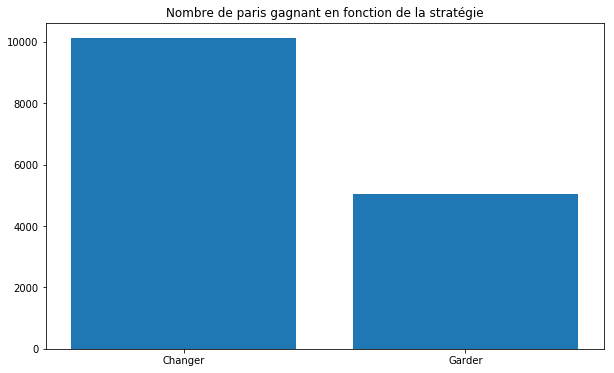

In [12]:
plt.figure(figsize=(10,6))
plot = plt.bar([1,2],[score_w_change.sum(), score_wo_change.sum()], tick_label=["Changer","Garder"])
plt.title("Nombre de paris gagnant en fonction de la stratégie")
plt.show()

On peut aussi regarder en fonction du nombre de parties jouées

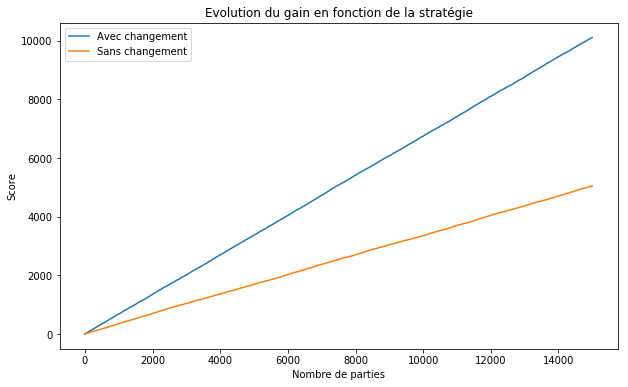

In [13]:
plt.figure(figsize=(10,6))
plt.plot(score_w_change.cumsum(), label="Avec changement")
plt.plot(score_wo_change.cumsum(), label="Sans changement")
plt.title("Evolution du gain en fonction de la stratégie")
plt.ylabel("Score")
plt.xlabel("Nombre de parties")
plt.legend()
plt.show()

On remarque que c'est très linéaire mais qu'en est-il au tout départ ??

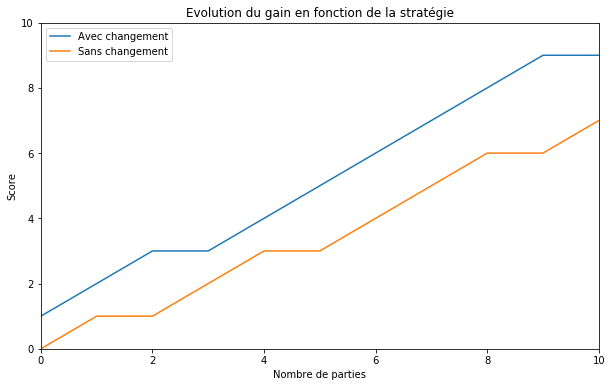

In [14]:
plt.figure(figsize=(10,6))
plt.plot(score_w_change.cumsum(), label="Avec changement")
plt.plot(score_wo_change.cumsum(), label="Sans changement")
plt.title("Evolution du gain en fonction de la stratégie")
plt.ylabel("Score")
plt.xlabel("Nombre de parties")
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend()
plt.show()

dès les premières parties, le gain est supérieur avec changements